In [6]:
library(Seurat)
library(ggplot2)
library(harmony)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

Loading required package: Rcpp



[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [2]:
####### CD8
load("data_out/2.SCLC.filter.rdata")
subset(SCLC.filter,celltype=="CD8T")->SCLC.CD8
ls()

[1] "SCLC.CD8"    "SCLC.filter"

In [3]:
SCLC.CD8 <- FindVariableFeatures(SCLC.CD8, selection.method = "vst", nfeatures = 1000)

SCLC.CD8 <- ScaleData(SCLC.CD8, features = VariableFeatures(object = SCLC.CD8))
#SCLC.CD8 <- ScaleData(SCLC.CD8, features = Tgene)

Centering and scaling data matrix



In [ ]:
library(reticulate)
# reticulate::py_config()
# use_python ("~/.virtualenvs/r-reticulate/lib/python3.7/site-packages")

In [7]:
SCLC.CD8 <- RunPCA(SCLC.CD8, npcs = 30, verbose = FALSE, features = VariableFeatures(object = SCLC.CD8),seed.use=42)
SCLC.CD8 <- RunHarmony(SCLC.CD8, "orig.ident")

SCLC.CD8 <- RunUMAP(SCLC.CD8, umap.method = 'umap-learn',reduction = "harmony", dims = 1:30, metric="correlation",seed.use=10)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


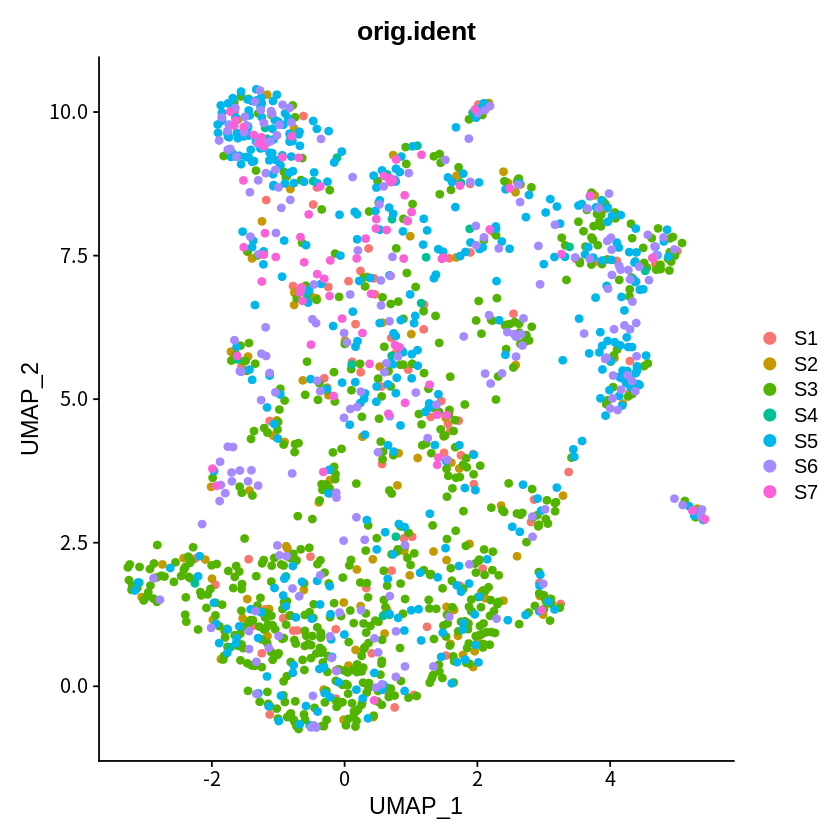

In [34]:
DimPlot(SCLC.CD8, reduction = "umap",group.by="orig.ident", pt.size = 1.8)  
# DimPlot(SCLC.CD8, reduction = "umap",group.by="orig.ident", pt.size = 1.8) + ggsci::scale_color_npg(alpha = 1) 

In [9]:
SCLC.CD8 <- FindNeighbors(SCLC.CD8,  reduction="harmony",dims = 1:30)
SCLC.CD8 <- FindClusters(SCLC.CD8,resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1511
Number of edges: 73929

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 6
Elapsed time: 0 seconds


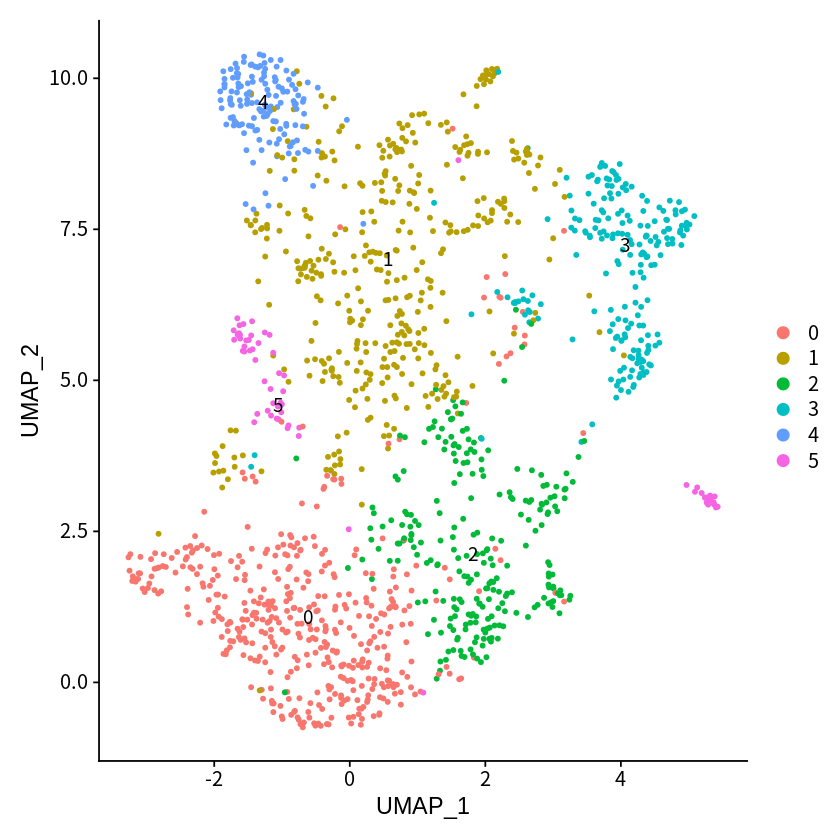

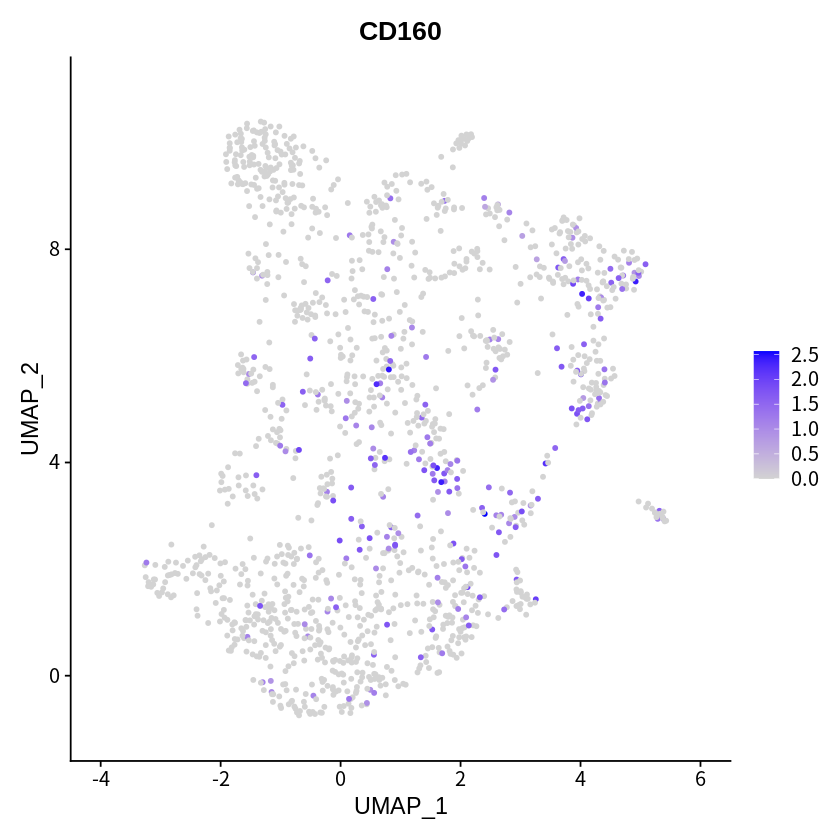

In [10]:
DimPlot(SCLC.CD8, reduction = "umap",label=T,repel=F)  

FeaturePlot(SCLC.CD8,"CD160")

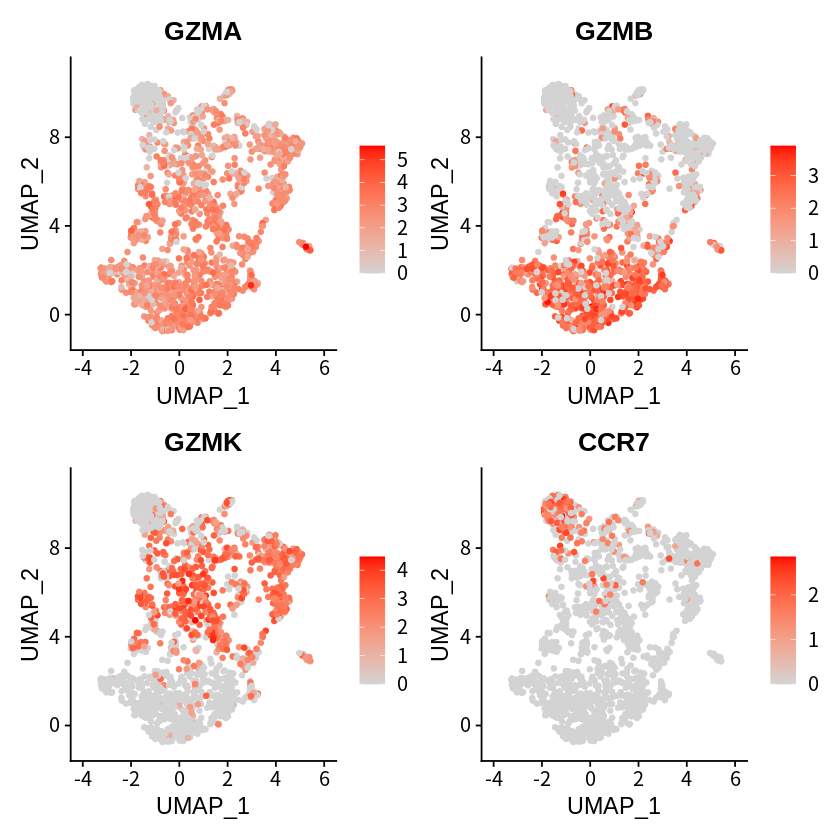

In [19]:
FeaturePlot(SCLC.CD8,c("GZMA","GZMB","GZMK","CCR7"), pt.size = 1.2,  cols = c("lightgrey", "#ff0000")) # red
# FeaturePlot(SCLC.CD8,c("GZMA","GZMB","GZMK","CCR7"),  cols = c("lightgrey", "#00ff00")) # green

In [ ]:
# VlnPlot(SCLC.CD8,c("ZEB2","TBX21","EOMES","PDCD1","CD160","CXCR6"))
# VlnPlot(SCLC.CD8,c("GZMA","GZMB","GZMK","CCR7"))

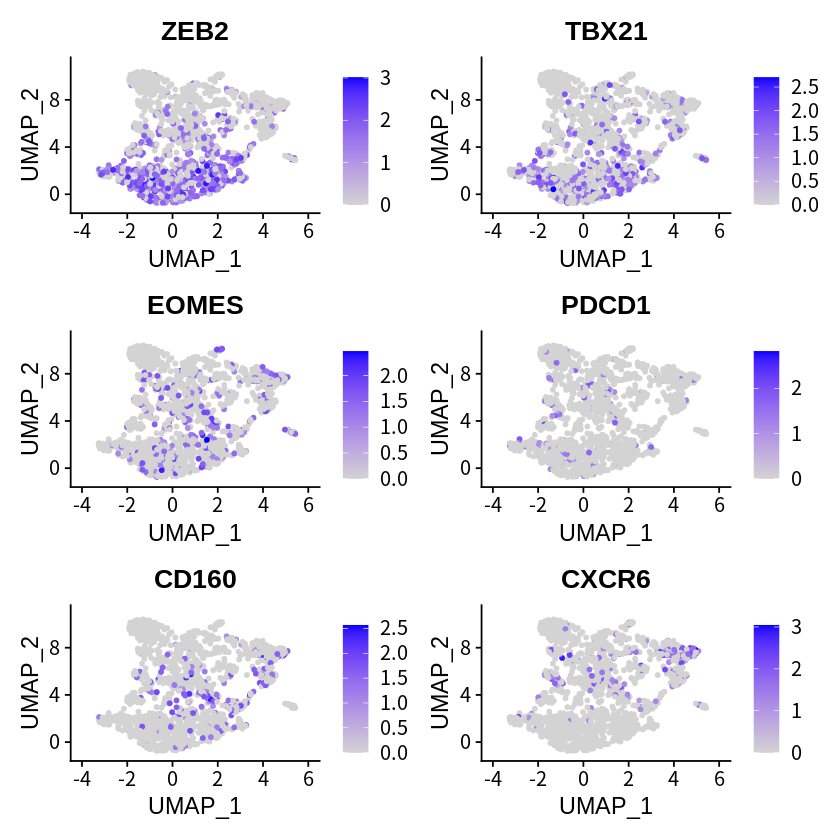

In [20]:
# FeaturePlot(SCLC.CD8,c("ZEB2","TBX21","EOMES","PDCD1","CD160","CXCR6"))

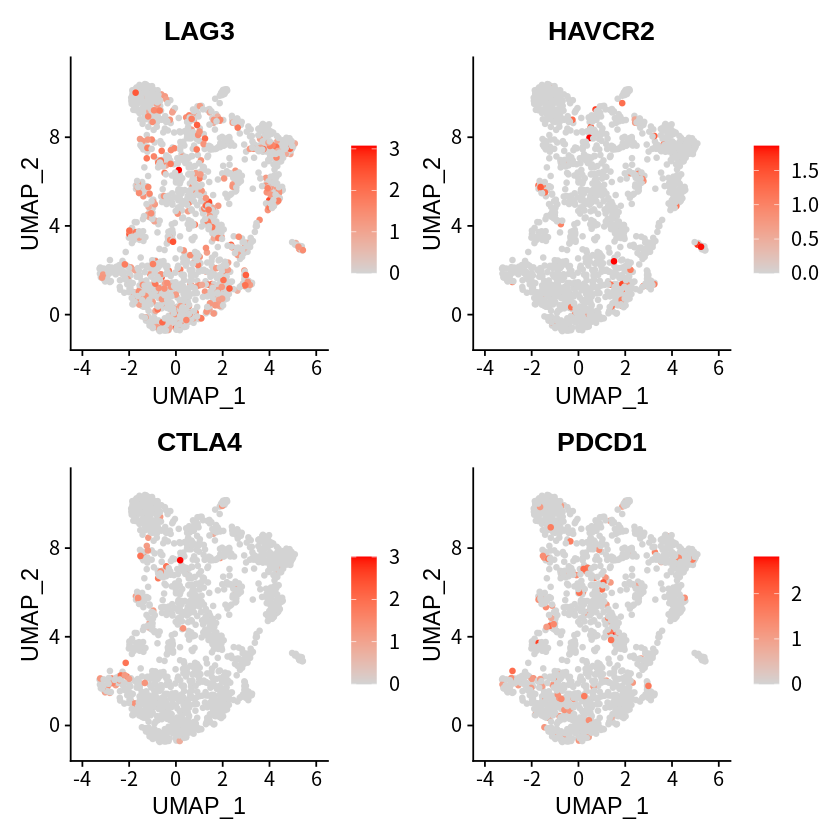

In [18]:
FeaturePlot(SCLC.CD8,c("LAG3","HAVCR2","CTLA4","PDCD1"), ncol = 2, pt.size = 1.2, cols = c("lightgrey", "#ff0000"))

In [43]:
# save
# save(SCLC.CD8,file = "data_out/6_SCLC.CD8.rdata")

In [3]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] reticulate_1.22    harmony_0.1.0      Rcpp_1.0.7         ggplot2_3.3.5     
[5] SeuratObject_4.0.4 Seurat_4.0.6      

loaded via a namespace (and not attached):
  [1] nlme_3.1-153          spatstat.sparse_2.1-0 matrixStats_0.61.0   
  [4] RcppAnnoy_0.0.19      RColorBrewer_1.1-2    httr_1.4.2    